설계 목표 : 다음 시즌에 어떤 게임을 설계해야 하는가.

설계 전 고민해야 할 것

> 1) 지역이 트렌드에 영향력을 미치는 가.

> 2) 연도별로 트렌드의 변화가 존재하는 가.

> 3) 개별 종목으로써, 출고량이 높은 게임은 어떤 특징을 가지는 가.

> 4) 장르, 제작사, 플랫폼을 선택함이 중요할까




# 데이터 전처리

1. 데이터 불러오기
2. 결측치 제거 및 인덱스 초기화
3. 단위 초기화
4. 연도 전처리
5. unnamed 열 제거(2020")

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
from scipy import stats

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 
plt.rc('axes', unicode_minus=False)

In [ ]:
df = pd.read_csv('/Users/ryuchangmin/Desktop/codestates_project/data_analasys/game_data.csv')
df

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...
16593,16594,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,16595,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,16596,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,16597,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [ ]:
df = df.dropna().reset_index(drop=True)
df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16241 entries, 0 to 16240
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16241 non-null  int64  
 1   Name         16241 non-null  object 
 2   Platform     16241 non-null  object 
 3   Year         16241 non-null  float64
 4   Genre        16241 non-null  object 
 5   Publisher    16241 non-null  object 
 6   NA_Sales     16241 non-null  object 
 7   EU_Sales     16241 non-null  object 
 8   JP_Sales     16241 non-null  object 
 9   Other_Sales  16241 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.2+ MB


In [ ]:
#단위 전처리

def km_remove(string):
    if string[-1] == 'K':
      return float(string.replace('K',''))/1000
    else:
      return float(string.replace('M',''))

In [ ]:
df.loc[:,'NA_Sales':'Other_Sales'] = df.loc[:,'NA_Sales':'Other_Sales'].applymap(km_remove)

In [ ]:
#연도 전처리
for i in range(len(df['Year'])):
  if df.iloc[i,3] <100:
    if df.iloc[i,3]>50:
      df.iloc[i,3] = df.iloc[i,3]+1900
    else:
      df.iloc[i,3] = df.iloc[i,3]+2000

In [ ]:
#연도 전처리 함수

def decade(year, y=5):
  try:
    return int(year-year%y)
  except:
    return year



In [ ]:
#인덱스 값 삭제
df = df.iloc[:,1:]
df.loc[:,'NA_Sales':'Other_Sales'] = df.loc[:,'NA_Sales':'Other_Sales'].astype(float)
df['Total_Sales'] = df.loc[:,'NA_Sales':'Other_Sales'].sum(axis=1)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16236,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16237,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16238,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16239,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


# 1. 지역에 따라 선호하는 게임 장르

1. 지역별 판매량 기준 장르 선호도 및 시각화
2. 지역별 판매량의 백분율 기준 장르 선호도 및 시각화
3. 카이제곱 검증
4. 상관계수 시각화
5. 절사평균 및 중앙값 비교

In [ ]:
#판매량 기준 북미 게임 장르 선호도

df_genre = df.groupby('Genre').sum()#장르를 기준으로 그룹화 및 지역별 판매량 평균
df_genre_na = df_genre.iloc[:,1] #북미 지역만 sort
df_genre_na = pd.DataFrame(df_genre_na)


In [ ]:
#판매량 기준 유럽 게임 장르 선호도

df_genre_eu = df_genre.iloc[:,2]
df_genre_eu = pd.DataFrame(df_genre_eu)


In [ ]:
#판매량 기준 일본 게임 장르 선호도

df_genre_jp = df_genre.iloc[:,3]
df_genre_jp = pd.DataFrame(df_genre_jp)


In [ ]:
#판매량 기준 기타 게임 장르 선호도

df_genre_other = df_genre.iloc[:,4]
df_genre_other = pd.DataFrame(df_genre_other)


In [ ]:
#판매량 기준 지역별 장르 선호도

df_concat = pd.concat([df_genre_na,df_genre_eu,df_genre_jp,df_genre_other],axis=1)

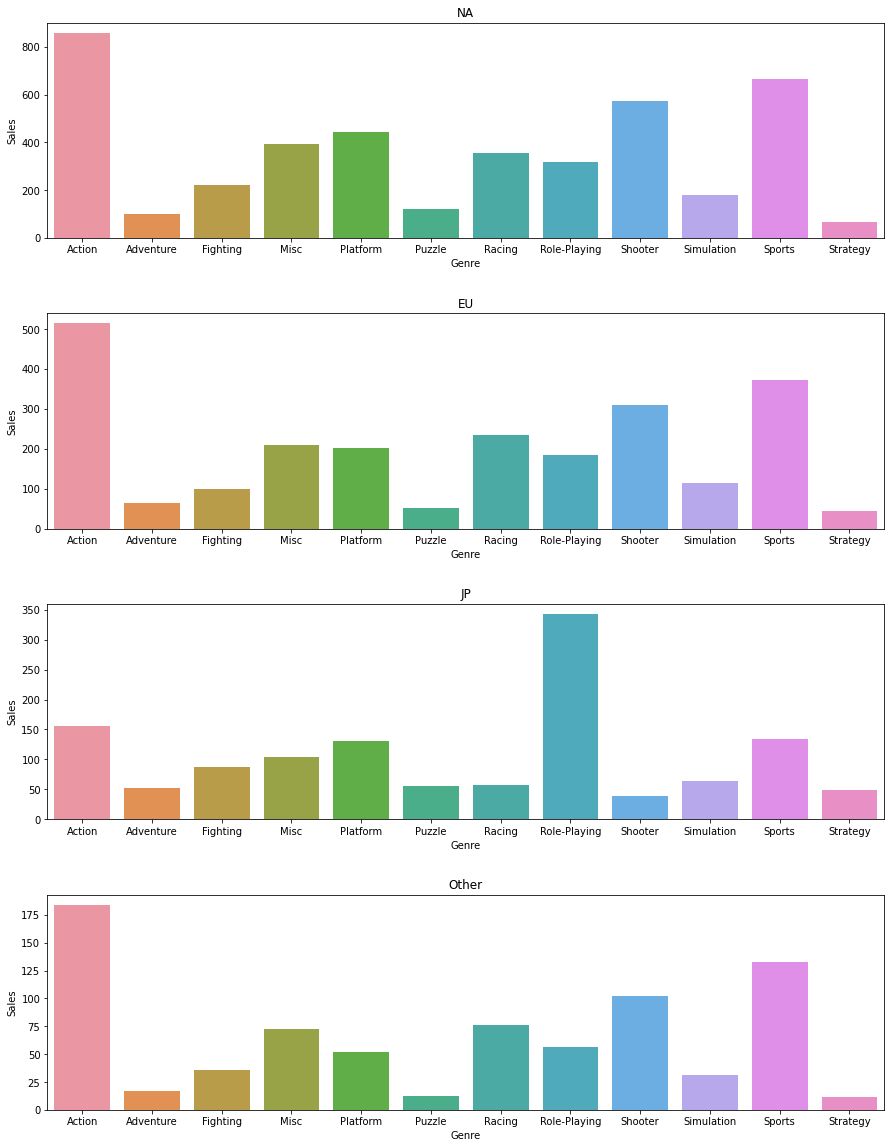

In [ ]:
# 지역별 판매량 시각화
figure , (ax1, ax2,ax3,ax4) = plt.subplots(nrows=4)
figure.set_size_inches(15,20)

sns.barplot(data=df_concat, x=df_concat.index, y=df_concat.loc[:,'NA_Sales'],ax = ax1)
sns.barplot(data=df_concat, x=df_concat.index, y=df_concat.loc[:,'EU_Sales'],ax = ax2)
sns.barplot(data=df_concat, x=df_concat.index, y=df_concat.loc[:,'JP_Sales'],ax = ax3)
sns.barplot(data=df_concat, x=df_concat.index, y=df_concat.loc[:,'Other_Sales'],ax = ax4)

ax1.set(ylabel='Sales', title = 'NA')
ax2.set(ylabel='Sales', title = 'EU')
ax3.set(ylabel='Sales',title = 'JP')
ax4.set(ylabel='Sales',title = 'Other')

plt.subplots_adjust(hspace=0.35)
plt.show()

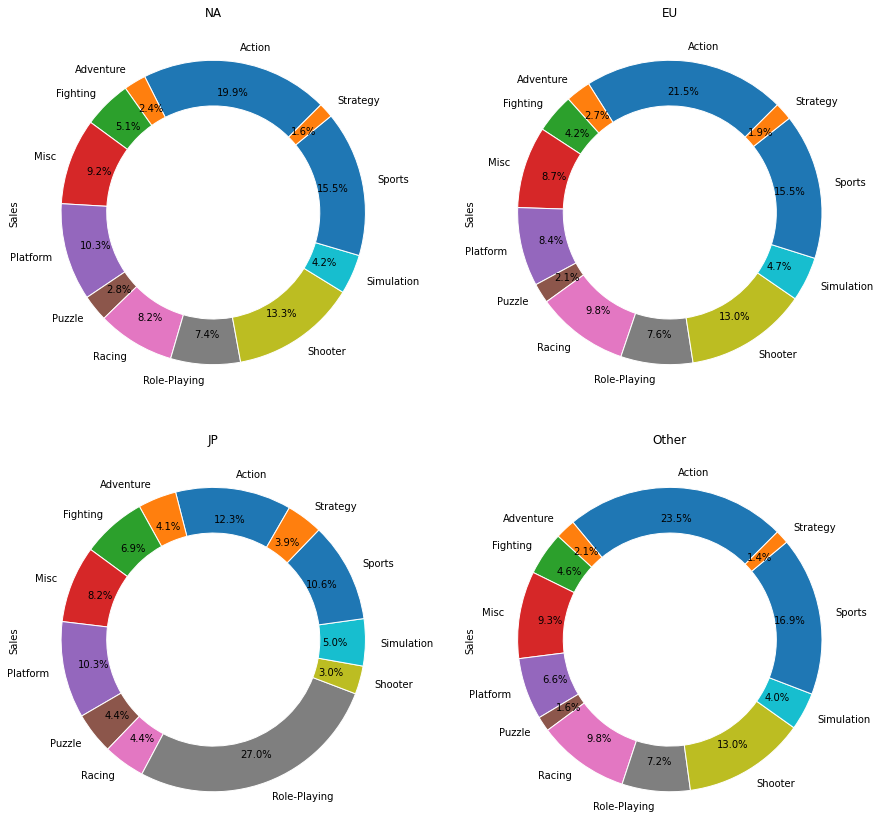

In [ ]:
#판매량의 파이 차트

figure , ((ax1, ax2),(ax3,ax4)) = plt.subplots(ncols=2, nrows=2)
figure.set_size_inches(15,15)

ax1.pie(df_concat.loc[:,'NA_Sales'],autopct='%.1f%%',labels = df_concat.index,pctdistance=0.8, counterclock=True,\
        startangle=45,wedgeprops=dict(width=0.3,edgecolor='white',linewidth=1))
ax2.pie(df_concat.loc[:,'EU_Sales'],autopct='%.1f%%',labels = df_concat.index,pctdistance=0.8, counterclock=True,\
        startangle=45,wedgeprops=dict(width=0.3,edgecolor='white',linewidth=1))
ax3.pie(df_concat.loc[:,'JP_Sales'],autopct='%.1f%%',labels = df_concat.index,pctdistance=0.8, counterclock=True,\
        startangle=60,wedgeprops=dict(width=0.3,edgecolor='white',linewidth=1))
ax4.pie(df_concat.loc[:,'Other_Sales'],autopct='%.1f%%',labels = df_concat.index,pctdistance=0.8, counterclock=True,\
        startangle=45,wedgeprops=dict(width=0.3,edgecolor='white',linewidth=1))

ax1.set(ylabel='Sales', title = 'NA')
ax2.set(ylabel='Sales', title = 'EU')
ax3.set(ylabel='Sales',title = 'JP')
ax4.set(ylabel='Sales',title = 'Other')

plt.subplots_adjust(hspace=0.1)
plt.show()

In [ ]:
#카이 제곱(전체)
chi2_contingency(df_concat)

(684.336340516923,
 9.635373883711956e-123,
 33,
 array([[842.66837143, 468.29974503, 248.7462714 , 153.26561214],
        [115.12174823,  63.97710792,  33.98265154,  20.93849231],
        [218.19118114, 121.25633043,  64.40759449,  39.68489393],
        [383.55878598, 213.15678595, 113.22226051,  69.76216756],
        [407.31414544, 226.35845479, 120.23457673,  74.08282303],
        [118.42260683,  65.81150838,  34.95702805,  21.53885674],
        [355.44491575, 197.53294304, 104.92336069,  64.64878052],
        [443.48093003, 246.45757869, 130.91060674,  80.66088454],
        [504.10653576, 280.14930922, 148.80660697,  91.68754804],
        [191.49899218, 106.42256462,  56.52835908,  34.83008412],
        [642.13752173, 356.85786709, 189.55180907, 116.79280211],
        [ 85.09426549,  47.28980484,  25.11887472,  15.47705495]]))

In [ ]:
#카이 제곱(JP 제외)
df_non_jp = df_concat.drop('JP_Sales', axis=1)
chi2_contingency(df_non_jp)

(36.9080140343127,
 0.024211477694325877,
 22,
 array([[895.69866771, 497.77050134, 162.91083095],
        [104.82755646,  58.25627213,  19.06617141],
        [205.10865288, 113.98592033,  37.30542679],
        [388.76261839, 216.04873428,  70.70864732],
        [401.38911627, 223.06571266,  73.00517107],
        [106.17422943,  59.00466454,  19.31110603],
        [383.41621159, 213.07755247,  69.73623595],
        [321.4634998 , 178.64830352,  58.46819668],
        [567.77228865, 315.53055392, 103.26715743],
        [187.46378392, 104.18006085,  34.09615523],
        [673.67027747, 374.38170206, 122.52802047],
        [ 71.29309742,  39.62002191,  12.96688067]]))

p-value가 0.05 이하로, 지역에 따라 트렌드가 다르다.
다만 그래프로 확인 했을 때와 결과값이 달라 그 이유를 찾아야 할 것 같다.

In [ ]:
#지역별 판매량 백분율

df_genre_na['percent'] = round(df_genre_na['NA_Sales']/df_genre_na['NA_Sales'].sum()*100,2) #북미 판매량을 백분율로 구하기
df_genre_eu['percent'] = round(df_genre_eu['EU_Sales']/df_genre_eu['EU_Sales'].sum()*100,2) #유럽 판매량을 백분율로 구하기
df_genre_jp['percent'] = round(df_genre_jp['JP_Sales']/df_genre_jp['JP_Sales'].sum()*100,2) #일본 판매량을 백분율로 구하기
df_genre_other['percent'] = round(df_genre_other['Other_Sales']/df_genre_other['Other_Sales'].sum()*100,2) #기타 지역 판매량을 백분율로 구하기
df_concat2 = pd.concat([df_genre_na,df_genre_eu,df_genre_jp,df_genre_other],axis=1)
df_concat2 = df_concat2.drop(['NA_Sales','EU_Sales','JP_Sales','Other_Sales'], axis=1)
df_concat2.columns = ['NA','EU','JP','Other']
df_concat2

,NA,EU,JP,Other
Genre,,,,
Action,19.94,21.46,12.32,23.49
Adventure,2.36,2.66,4.08,2.13
Fighting,5.12,4.17,6.85,4.61
Misc,9.16,8.70,8.19,9.27
Platform,10.34,8.38,10.27,6.57
Puzzle,2.82,2.11,4.42,1.59
Racing,8.24,9.82,4.43,9.77
Role-Playing,7.40,7.65,26.97,7.24
Shooter,13.34,12.96,3.00,13.00


서로 영향을 준다고 말할 수 없다.
귀무가설을 기각하지 않는다.
독립적이다.

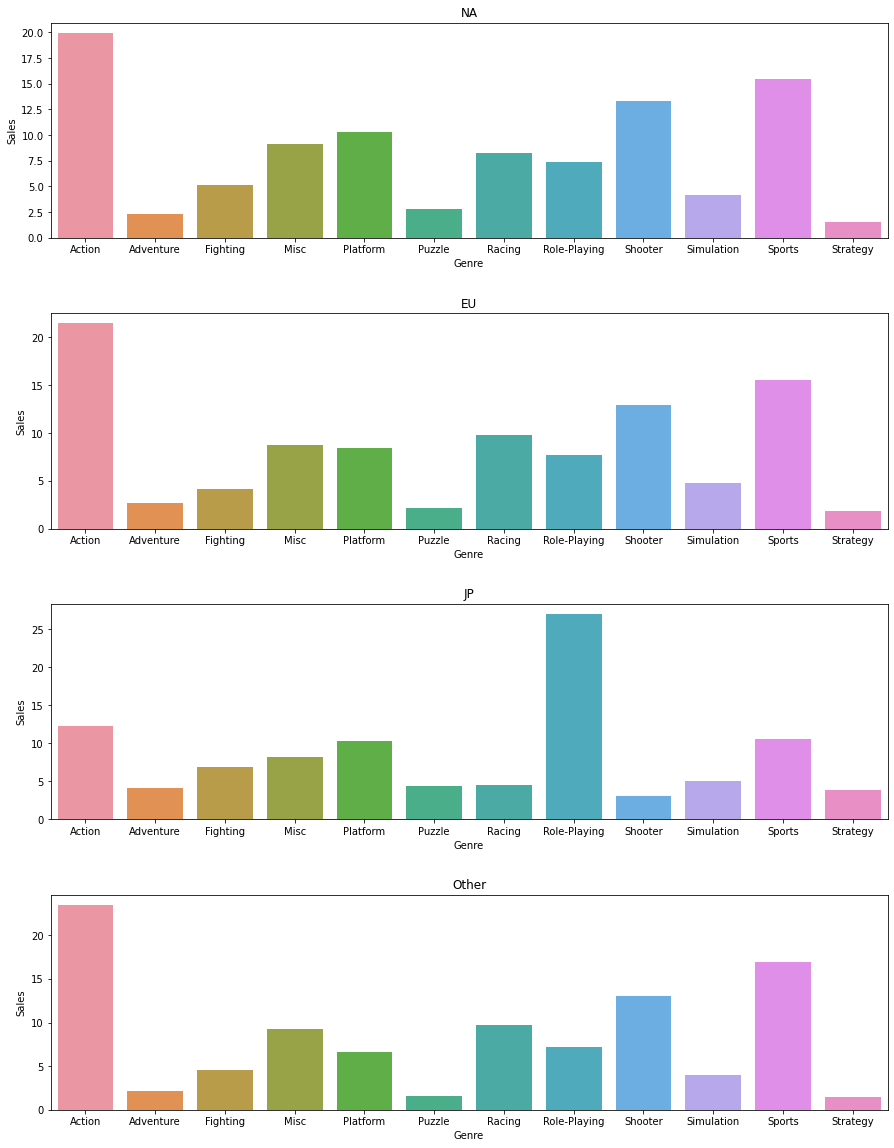

In [ ]:
# 지역별 판매량 시각화
figure , (ax1, ax2,ax3,ax4) = plt.subplots(nrows=4)
figure.set_size_inches(15,20)

sns.barplot(data=df_concat2, x=df_concat2.index, y=df_concat2.loc[:,'NA'],ax = ax1)
sns.barplot(data=df_concat2, x=df_concat2.index, y=df_concat2.loc[:,'EU'],ax = ax2)
sns.barplot(data=df_concat2, x=df_concat2.index, y=df_concat2.loc[:,'JP'],ax = ax3)
sns.barplot(data=df_concat2, x=df_concat2.index, y=df_concat2.loc[:,'Other'],ax = ax4)

ax1.set(ylabel='Sales', title = 'NA')
ax2.set(ylabel='Sales', title = 'EU')
ax3.set(ylabel='Sales',title = 'JP')
ax4.set(ylabel='Sales',title = 'Other')

plt.subplots_adjust(hspace=0.35)
plt.show()

In [ ]:
chi2_contingency(df_concat2)

(44.50114346763401,
 0.08718864490126714,
 33,
 array([[19.3020174 , 19.3039478 , 19.3020174 , 19.3020174 ],
        [ 2.80742981,  2.80771058,  2.80742981,  2.80742981],
        [ 5.1873703 ,  5.18788909,  5.1873703 ,  5.1873703 ],
        [ 8.82977923,  8.8306623 ,  8.82977923,  8.82977923],
        [ 8.88977773,  8.8906668 ,  8.88977773,  8.88977773],
        [ 2.73493162,  2.73520514,  2.73493162,  2.73493162],
        [ 8.06479836,  8.06560492,  8.06479836,  8.06479836],
        [12.3146921 , 12.31592369, 12.3146921 , 12.3146921 ],
        [10.57473561, 10.57579318, 10.57473561, 10.57473561],
        [ 4.48238793,  4.48283621,  4.48238793,  4.48238793],
        [14.61963447, 14.62109658, 14.61963447, 14.61963447],
        [ 2.18244543,  2.1826637 ,  2.18244543,  2.18244543]]))

In [ ]:
df_non_jp = df_concat2.drop('JP', axis=1)
chi2_contingency(df_non_jp)

(2.0639255466004873,
 0.9999999862044975,
 22,
 array([[21.62927895, 21.6314421 , 21.62927895],
        [ 2.38325388,  2.38349223,  2.38325388],
        [ 4.63317888,  4.63364224,  4.63317888],
        [ 9.04303187,  9.04393626,  9.04303187],
        [ 8.42971898,  8.43056204,  8.42971898],
        [ 2.17326088,  2.17347823,  2.17326088],
        [ 9.27635742,  9.27728515,  9.27635742],
        [ 7.42975232,  7.43049537,  7.42975232],
        [13.0995633 , 13.10087339, 13.0995633 ],
        [ 4.30985632,  4.31028735,  4.30985632],
        [15.95946796, 15.96106407, 15.95946796],
        [ 1.62327922,  1.62344156,  1.62327922]]))

귀무가설은 정답이다.
지역과 장르는 영향이 전혀 없다.

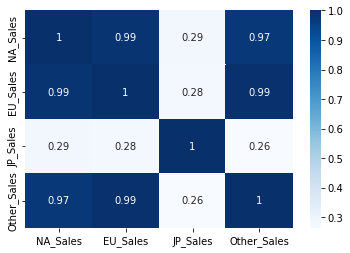

In [ ]:
#상관 계수의 시각화
df_corr = df_concat.corr()
sns.heatmap(df_corr, cmap= 'Blues', annot= True)

일본을 제외한 다른 시장은 1에 수렴하는 결과를 얻을 수 있습니다. 상관 계수를 통해 각 지역별로 유의미한 차이가 존재하지 않는다는 것을 알 수 있습니다.

In [ ]:
#장르별 구분
df_action = df[df['Genre']=='Action']
df_sports = df[df['Genre']=='Sports']
df_shooter = df[df['Genre']=='Shooter']
df_platform = df[df['Genre']=='Platform']
df_role = df[df['Genre']=='Role-Playing']

In [ ]:
#장르별 절사평균(아웃라이어에 민감) 구하기
avr_ac = stats.trim_mean(df_action['NA_Sales'],0.1)
avr_sp = stats.trim_mean(df_sports['NA_Sales'],0.1)
avr_sh = stats.trim_mean(df_shooter['NA_Sales'],0.1)
avr_pl = stats.trim_mean(df_platform['NA_Sales'],0.1)
avr_ro = stats.trim_mean(df_role['NA_Sales'],0.1)


print(avr_ac,avr_sp,avr_sh,avr_pl,avr_ro)

0.14648148148148146 0.16141770776751763 0.21481445312499997 0.24320457796852643 0.08219096334185848


절사평균은 아웃라이어의 영향력을 최대한 배제하기 위하여, two side를 설정한 비율로 제거하여 평균을 구하는 것입니다.
해당 결과로 장르별 대작게임을 제외한 중간값에서의 평균값을 알 수 있습니다. 

In [ ]:
#장르별 중앙값에 따른 선호도
df_g=df.groupby('Genre').median()
df_g = df_g.sort_values('Total_Sales',ascending=False)
df_g

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Genre,,,,,,
Platform,2004.0,0.14,0.05,0.00,0.01,0.28
Shooter,2007.0,0.12,0.05,0.00,0.02,0.23
Sports,2006.0,0.11,0.02,0.00,0.01,0.22
Fighting,2005.0,0.08,0.03,0.02,0.01,0.21
Action,2009.0,0.10,0.03,0.00,0.01,0.19
Racing,2005.0,0.10,0.04,0.00,0.01,0.19
Role-Playing,2008.0,0.04,0.01,0.05,0.01,0.19
Misc,2008.0,0.08,0.01,0.00,0.01,0.16
Simulation,2008.0,0.07,0.01,0.00,0.01,0.16


위 테스트와 마찬가지로, 장르별 중앙값을 구하여 비교분석합니다. 각 지역별로 장르에 대한 중앙값은 유사합니다.

두 가지 테스트를 통하여, 장르별 판매량의 차이가 보이는 이유는 인기 게임의 유무라고 판단됩니다. 따라서 트렌드는 지역과는 무관합니다.

# 2. 연도별 트렌드

1. 지역별 판매량 기준 장르 선호도 및 시각화
2. 지역별 판매량의 백분율 기준 장로 선호도 및 시각화
3. 카이제곱 검증, 공분산
4. 상관계수 시각화

In [ ]:
df1= df.copy()
df1['Year'] = df1['Year'].apply(decade)

In [ ]:
#연도별 장르의 출시량
df1_release = pd.crosstab(df1.Genre,df1.Year)

In [ ]:
# 연도와 장르별 판매량 수치
df1_year = df1.groupby(by = ['Year','Genre']).sum()
df1_year = df1_year.fillna(0)

In [ ]:
df1_year.reset_index(drop=False, inplace=True)

In [ ]:
df1_pivot=df1_year.pivot(index='Genre',columns='Year',values='Total_Sales')
df1_pivot = df1_pivot.drop(2020,axis=1)
df1_pivot = df1_pivot.fillna(0)

[Text(0.5, 1.0, 'release')]

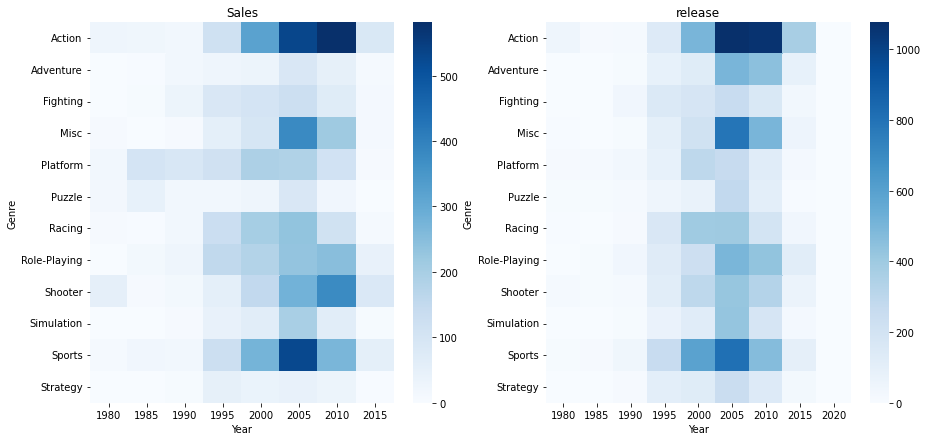

In [ ]:
# 연도별 판매량과 출시량 히트맵
figure, (ax21,ax22) = plt.subplots(ncols=2)
figure.set_size_inches(15,7)

sns.heatmap(df1_pivot, cmap= 'Blues',ax=ax21)
sns.heatmap(df1_release, cmap= 'Blues',ax=ax22)

ax21.set(title = 'Sales')
ax22.set(title = 'release')

In [ ]:
df1_pivot_rank = df1_pivot.T[['Action','Misc','Platform','Role-Playing','Shooter','Sports']]
df1_release_rank = df1_release.T[['Action','Misc','Platform','Role-Playing','Shooter','Sports']]

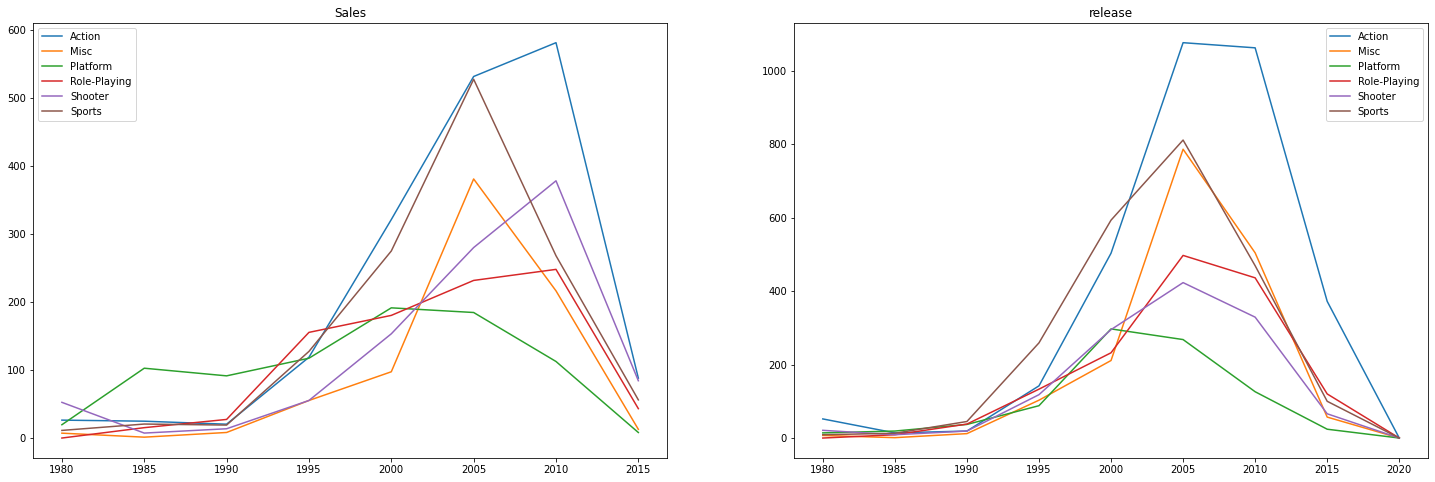

In [ ]:
#연도별 장르의 판매량 선 그래프

figure, (ax23,ax24) = plt.subplots(ncols=2)
figure.set_size_inches(25,8)

ax23.plot(df1_pivot_rank)
ax24.plot(df1_release_rank)

ax23.legend(df1_pivot_rank)
ax24.legend(df1_release_rank)

ax23.set(title = 'Sales')
ax24.set(title = 'release')
plt.subplots_adjust(wspace=0.2)

plt.show()

'Action', 'Sports'은 시장에서의 관심이 급증하며, 가장 많은 수요를 담당한다. 다만, 공급과잉이다.
'Shooter'는 꾸준히 수요가 증가하고 있다. 공급과 수요가 적절하다.
'Misc'는 시장의 관심을 짧게 받았지만, 인기가 빠르게 사그라들고 있다.

위 그래프를 보면, 시장에서의 Hot issue는 'Action'으로 확인된다.

In [ ]:
#지역별 출시량 데이터 전처리

df1_release_1980=df1_release.iloc[:,0]
df1_release_1980 =  pd.DataFrame(df1_release_1980)
df1_release_1985=df1_release.iloc[:,1]
df1_release_1985 =  pd.DataFrame(df1_release_1985)
df1_release_1990=df1_release.iloc[:,2]
df1_release_1990 =  pd.DataFrame(df1_release_1990)
df1_release_1995=df1_release.iloc[:,3]
df1_release_1995 =  pd.DataFrame(df1_release_1995)
df1_release_2000=df1_release.iloc[:,4]
df1_release_2000 =  pd.DataFrame(df1_release_2000)
df1_release_2005=df1_release.iloc[:,5]
df1_release_2005 =  pd.DataFrame(df1_release_2005)
df1_release_2010=df1_release.iloc[:,6]
df1_release_2010 =  pd.DataFrame(df1_release_2010)
df1_release_2015=df1_release.iloc[:,7]
df1_release_2015 =  pd.DataFrame(df1_release_2015)



In [ ]:
#지역별 출시량 백분율

df1_release_1980['percent'] = round(df1_release_1980[1980]/df1_release_1980[1980].sum()*100,2) #북미 판매량을 백분율로 구하기
df1_release_1985['percent'] = round(df1_release_1985[1985]/df1_release_1985[1985].sum()*100,2) #북미 판매량을 백분율로 구하기
df1_release_1990['percent'] = round(df1_release_1990[1990]/df1_release_1990[1990].sum()*100,2) #북미 판매량을 백분율로 구하기
df1_release_1995['percent'] = round(df1_release_1995[1995]/df1_release_1995[1995].sum()*100,2) #북미 판매량을 백분율로 구하기
df1_release_2000['percent'] = round(df1_release_2000[2000]/df1_release_2000[2000].sum()*100,2) #북미 판매량을 백분율로 구하기
df1_release_2005['percent'] = round(df1_release_2005[2005]/df1_release_2005[2005].sum()*100,2) #북미 판매량을 백분율로 구하기
df1_release_2010['percent'] = round(df1_release_2010[2010]/df1_release_2010[2010].sum()*100,2) #북미 판매량을 백분율로 구하기
df1_release_2015['percent'] = round(df1_release_2015[2015]/df1_release_2015[2015].sum()*100,2) #북미 판매량을 백분율로 구하기




df1_release_concat = pd.concat([df1_release_1980,df1_release_1985,df1_release_1990,df1_release_1995,df1_release_2000,df1_release_2005,df1_release_2010,df1_release_2015],axis=1)
df1_release_concat = df1_release_concat.drop([1980,1985,1990,1995,2000,2005,2010,2015], axis=1)
df1_release_concat.columns = [1980,1985,1990,1995,2000,2005,2010,2015]
df1_release_concat_rank = df1_release_concat.T[['Action','Misc','Platform','Role-Playing','Shooter','Sports']]

In [ ]:
#지역별 출시량 데이터 전처리

df1_pivot_1980=df1_pivot.iloc[:,0]
df1_pivot_1980 =  pd.DataFrame(df1_pivot_1980)
df1_pivot_1985=df1_pivot.iloc[:,1]
df1_pivot_1985 =  pd.DataFrame(df1_pivot_1985)
df1_pivot_1990=df1_pivot.iloc[:,2]
df1_pivot_1990 =  pd.DataFrame(df1_pivot_1990)
df1_pivot_1995=df1_pivot.iloc[:,3]
df1_pivot_1995 =  pd.DataFrame(df1_pivot_1995)
df1_pivot_2000=df1_pivot.iloc[:,4]
df1_pivot_2000 =  pd.DataFrame(df1_pivot_2000)
df1_pivot_2005=df1_pivot.iloc[:,5]
df1_pivot_2005 =  pd.DataFrame(df1_pivot_2005)
df1_pivot_2010=df1_pivot.iloc[:,6]
df1_pivot_2010 =  pd.DataFrame(df1_pivot_2010)
df1_pivot_2015=df1_pivot.iloc[:,7]
df1_pivot_2015 =  pd.DataFrame(df1_pivot_2015)



In [ ]:
#지역별 판매량 백분율

df1_pivot_1980['percent'] = round(df1_pivot_1980[1980]/df1_pivot_1980[1980].sum()*100,2) #북미 판매량을 백분율로 구하기
df1_pivot_1985['percent'] = round(df1_pivot_1985[1985]/df1_pivot_1985[1985].sum()*100,2) #북미 판매량을 백분율로 구하기
df1_pivot_1990['percent'] = round(df1_pivot_1990[1990]/df1_pivot_1990[1990].sum()*100,2) #북미 판매량을 백분율로 구하기
df1_pivot_1995['percent'] = round(df1_pivot_1995[1995]/df1_pivot_1995[1995].sum()*100,2) #북미 판매량을 백분율로 구하기
df1_pivot_2000['percent'] = round(df1_pivot_2000[2000]/df1_pivot_2000[2000].sum()*100,2) #북미 판매량을 백분율로 구하기
df1_pivot_2005['percent'] = round(df1_pivot_2005[2005]/df1_pivot_2005[2005].sum()*100,2) #북미 판매량을 백분율로 구하기
df1_pivot_2010['percent'] = round(df1_pivot_2010[2010]/df1_pivot_2010[2010].sum()*100,2) #북미 판매량을 백분율로 구하기
df1_pivot_2015['percent'] = round(df1_pivot_2015[2015]/df1_pivot_2015[2015].sum()*100,2) #북미 판매량을 백분율로 구하기




df1_pivot_concat = pd.concat([df1_pivot_1980,df1_pivot_1985,df1_pivot_1990,df1_pivot_1995,df1_pivot_2000,df1_pivot_2005,df1_pivot_2010,df1_pivot_2015],axis=1)
df1_pivot_concat = df1_pivot_concat.drop([1980,1985,1990,1995,2000,2005,2010,2015], axis=1)
df1_pivot_concat.columns = [1980,1985,1990,1995,2000,2005,2010,2015]
df1_pivot_concat_rank = df1_pivot_concat.T[['Action','Misc','Platform','Role-Playing','Shooter','Sports']]

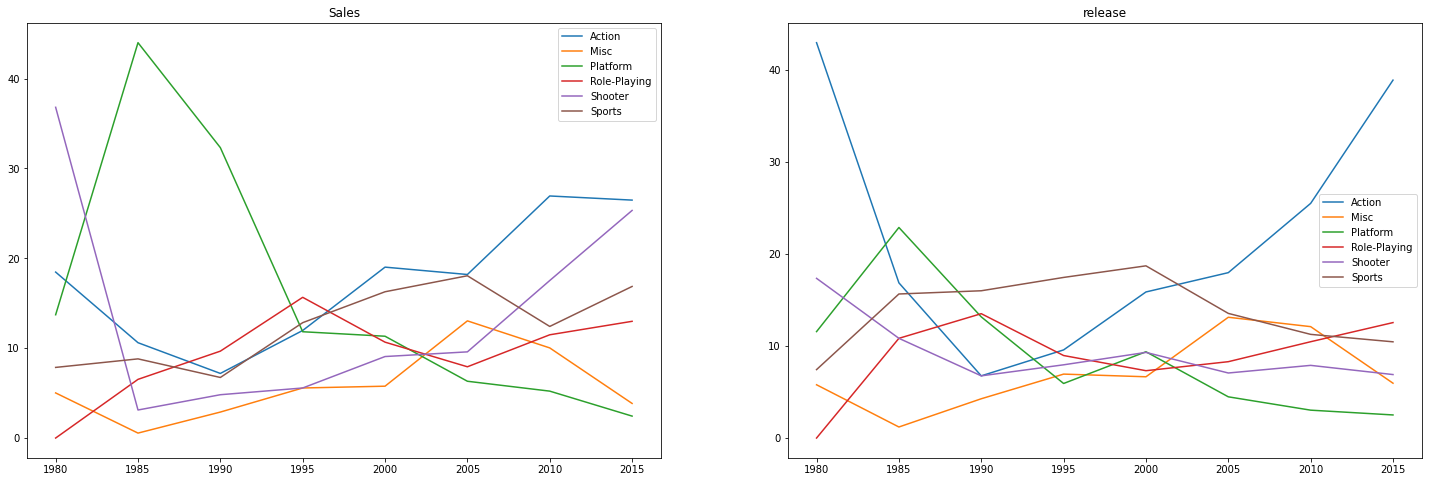

In [ ]:
#연도별 장르의 점유율

figure, (ax31,ax32) = plt.subplots(ncols=2)
figure.set_size_inches(25,8)

ax31.plot(df1_pivot_concat_rank)
ax32.plot(df1_release_concat_rank)

ax31.legend(df1_pivot_concat_rank)
ax32.legend(df1_release_concat_rank)

ax31.set(title = 'Sales')
ax32.set(title = 'release')
plt.subplots_adjust(wspace=0.2)

plt.show()


단순히 판매량으로 트렌드를 유추하는 것은, 시장 크기가 커짐에 따라 단순 수치 증가를 반영하지 못한다.
따라서, 장르별 시장 점유율을 같이 비교하는 것이 더욱 정확하다.
위의 수요에 대한 점유율을 보게 되면, 'Action'과 'Shooter'가 시장의 약 50%를 차지하고 있다는 것을 볼 수 있고,
'Sports'와 'Role-Playing'은 시장의 꾸준한 관심을 받고 있다는 것을 알 수 있다.
'Action'과 'Shooter'는 둘 다 시장의 관심과 시장 점유율이 높지만, 'Shooter'의 시장점유율이 빠르게 성장하는 것을 볼 수 있다.

공급에 대한 점유율을 보면, 'Action'이 상당히 많은 관심을 받고 있다.

두 그래프를 보았을 때, 공급자 대비 수요자 점유율을 비교하자면, 'Action'은 효율이 낮다고 판단된다.
그러나 'Shooter'의 경우, 공급자는 적으나, 소비자의 관심이 높다고 볼 수 있고, 이는 성공할 확률이 높다고 판단된다.

In [ ]:
#카이 제곱(전체)

chi2_contingency(df1_pivot)

(1922.863811604278,
 0.0,
 77,
 array([[ 27.89852499,  45.66404901,  55.36073811, 194.13726376,
         330.64809813, 571.79747765, 422.37533347,  65.09851487],
        [  3.81137714,   6.23842704,   7.56314722,  26.52220252,
          45.17172876,  78.11652542,  57.70311127,   8.89348063],
        [  7.22373395,  11.82374126,  14.33449415,  50.26774508,
          85.6143431 , 148.05488286, 109.3651738 ,  16.85588582],
        [ 12.69861874,  20.78498232,  25.19864067,  88.36578626,
         150.50165333, 260.26602373, 192.25329397,  29.63100097],
        [ 13.48509598,  22.07228102,  26.75929523,  93.83863969,
         159.82283434, 276.38535973, 204.16032433,  31.46616968],
        [  3.92065986,   6.41729998,   7.78000355,  27.28266734,
          46.46692703,  80.35634204,  59.3576189 ,   9.14848129],
        [ 11.76784273,  19.2614967 ,  23.35164527,  81.88880193,
         139.47027012, 241.18919513, 178.16162314,  27.45912499],
        [ 14.68248273,  24.03215264,  29.13534251, 1

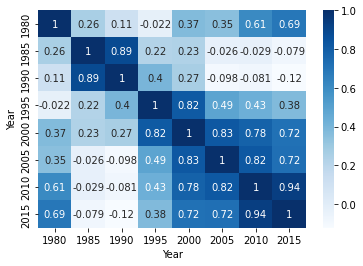

In [ ]:
#상관 계수의 시각화
df_year_corr = df1_pivot.corr()
sns.heatmap(df_year_corr, cmap= 'Blues', annot= True)

# 3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

In [ ]:
df1.groupby(by='Year').sum()
df1_all = df1.groupby(by='Year').sum()

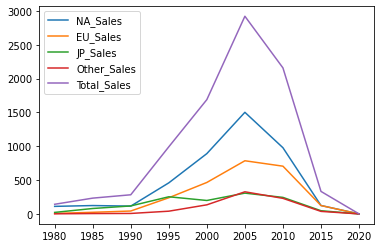

In [ ]:

plt.plot(df1_all)
plt.legend(df1_all)

시장의 성장성과 규모를 봤을 때, 북미 지역이 가장 크고 성장성이 두드러진다 할 수 있다.
지역과 장르에 따른 트렌드 분석을 봤을 때, 일본을 제외한 다른 지역은 동일하다고 할 수 있으며, 일본 시장은 상당히 작다라고 할 수 있다. 또한 시장의 크기가 1995년부터 발전이 이루어졌으므로, 이전의 데이터는 무의미하다 판단된다.
따라서 우리는 북미 시장을 공략해야 한다.

In [ ]:
df_game=df.groupby(by=['Name','Genre']).sum().drop('Year',axis=1)
df_game_total = df_game[df_game['Total_Sales']>27]
df_game_total.sort_values(by='Total_Sales',ascending=False)

,,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Name,Genre,,,,,
Wii Sports,Sports,41.49,29.02,3.77,8.46,82.74
Grand Theft Auto V,Action,23.46,23.04,1.39,8.03,55.92
Super Mario Bros.,Platform,32.48,4.88,6.96,0.99,45.31
Tetris,Puzzle,26.17,2.95,6.03,0.69,35.84
Mario Kart Wii,Racing,15.85,12.88,3.79,3.31,35.83
Wii Sports Resort,Sports,15.75,11.01,3.28,2.96,33.00
Pokemon Red/Pokemon Blue,Role-Playing,11.27,8.89,10.22,1.00,31.38
Call of Duty: Modern Warfare 3,Shooter,15.58,11.29,0.62,3.35,30.84
New Super Mario Bros.,Platform,11.38,9.23,6.50,2.90,30.01


북미 지역 전체 판매량 중 가장 높은 수치는 '액션'이지만, 단일 게임별 판매량 수치로 봤을 때는 '스포츠'가 최상위권에 위치한다. 이것은 곧, 전체 판매량 수치가 지역의 트렌드를 나타내지 않는다.

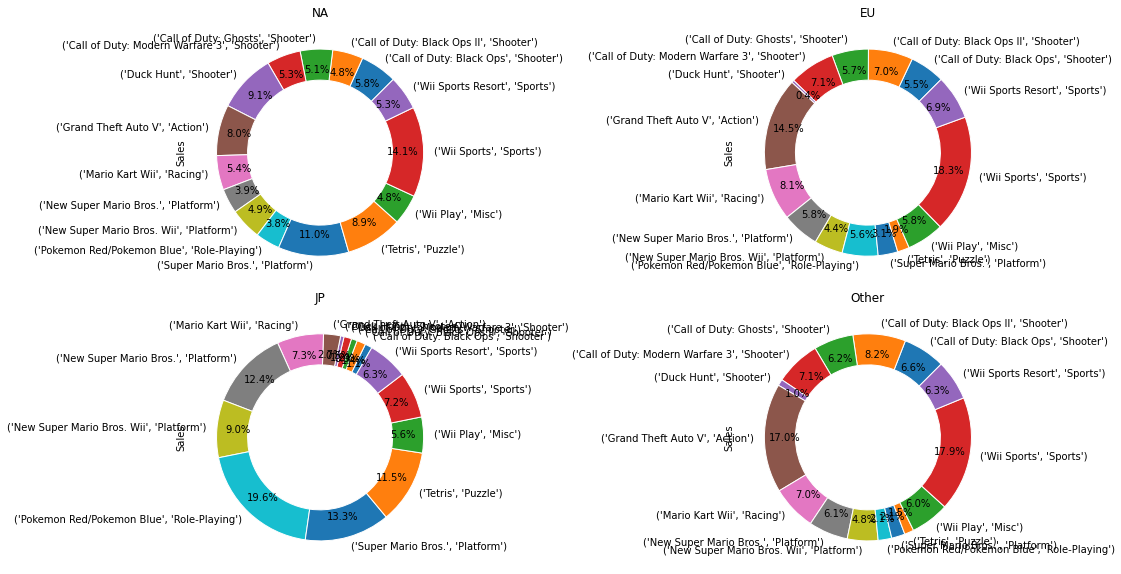

In [164]:
figure , ((ax1, ax2),(ax3,ax4)) = plt.subplots(ncols=2, nrows=2)
figure.set_size_inches(18,10)

ax1.pie(df_game_total.loc[:,'NA_Sales'],autopct='%.1f%%',labels = df_game_total.index,pctdistance=0.8, counterclock=True,\
        startangle=45,wedgeprops=dict(width=0.3,edgecolor='white',linewidth=1))
ax2.pie(df_game_total.loc[:,'EU_Sales'],autopct='%.1f%%',labels = df_game_total.index,pctdistance=0.8, counterclock=True,\
        startangle=45,wedgeprops=dict(width=0.3,edgecolor='white',linewidth=1))
ax3.pie(df_game_total.loc[:,'JP_Sales'],autopct='%.1f%%',labels = df_game_total.index,pctdistance=0.8, counterclock=True,\
        startangle=60,wedgeprops=dict(width=0.3,edgecolor='white',linewidth=1))
ax4.pie(df_game_total.loc[:,'Other_Sales'],autopct='%.1f%%',labels = df_game_total.index,pctdistance=0.8, counterclock=True,\
        startangle=45,wedgeprops=dict(width=0.3,edgecolor='white',linewidth=1))

ax1.set(ylabel='Sales', title = 'NA')
ax2.set(ylabel='Sales', title = 'EU')
ax3.set(ylabel='Sales',title = 'JP')
ax4.set(ylabel='Sales',title = 'Other')

plt.subplots_adjust(hspace=0.1)
plt.show()

단일 게임의 의존도가 크지 않은 것을 확인 할 수 있다. 다만 단일 게임 비교의 경우, 'Shooting'이 타 장르에 비해 많다.

In [ ]:
#플랫폼 장르의 지역별 판매량 추이
df_platform['Year'] = df_platform['Year'].apply(decade)
df_plat_g = df_platform.groupby(by='Year').sum()

#Shooter 장르의 지역별 판매량 추이
df_shooter['Year'] = df_shooter['Year'].apply(decade)
df_sh_g = df_shooter.groupby(by='Year').sum()

#Sports 장르의 지역별 판매량 추이
df_sports['Year'] = df_sports['Year'].apply(decade)
df_sp_g = df_sports.groupby(by='Year').sum()

#Action 장르의 지역별 판매량 추이
df_action['Year'] = df_action['Year'].apply(decade)
df_ac_g = df_action.groupby(by='Year').sum()

#Role-Playing 장르의 지역별 판매량 추이
df_role['Year'] = df_role['Year'].apply(decade)
df_ro_g = df_role.groupby(by='Year').sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

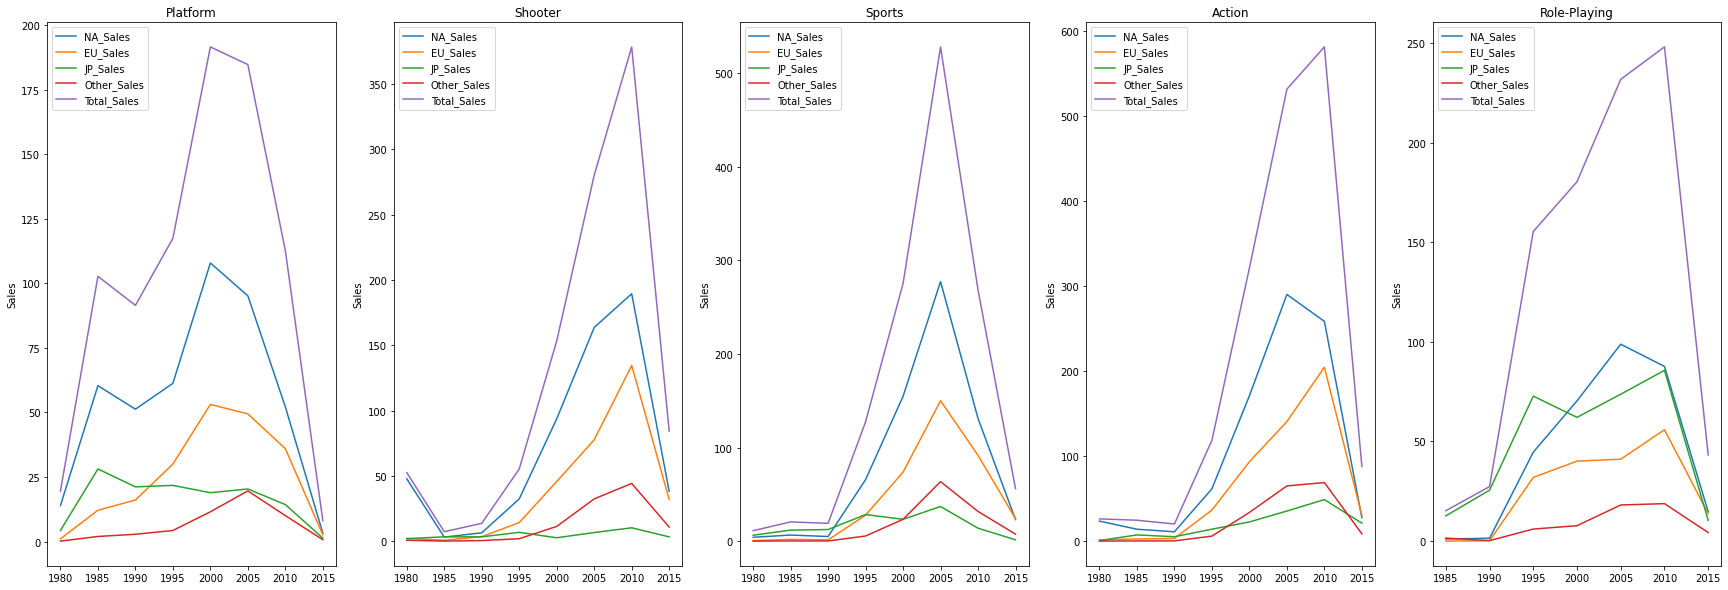

In [ ]:
#5개 장르의 지역별 판매량 시각화

figure, (ax11,ax12,ax13,ax14,ax15) = plt.subplots( ncols=5)
figure.set_size_inches(30,10)

ax11.plot(df_plat_g)#x=df_plat_g.index, y=df_plat_g.loc[:,'1980년대']
ax12.plot(df_sh_g)#x=df1_pivot.index, y=df1_pivot.loc[:,'1990년대']
ax13.plot(df_sp_g)# x=df1_pivot.index, y=df1_pivot.loc[:,'2000년대'],
ax14.plot(df_ac_g)#, x=df1_pivot.index, y=df1_pivot.loc[:,'2010년대']
ax15.plot(df_ro_g)

ax11.set(ylabel='Sales', title = 'Platform')
ax12.set(ylabel='Sales', title = 'Shooter')
ax13.set(ylabel='Sales',title = 'Sports')
ax14.set(ylabel='Sales',title = 'Action')
ax15.set(ylabel='Sales',title = 'Role-Playing')

ax11.legend(df_plat_g)
ax12.legend(df_sh_g)
ax13.legend(df_sp_g)
ax14.legend(df_ac_g)
ax15.legend(df_ro_g)

plt.subplots_adjust(wspace=0.2)

plt.show()

각 장르별 지역의 선호도는 비슷합니다.

In [ ]:
temp_pub = df.groupby(by=['Publisher','Genre']).sum()
temp_pub[temp_pub['Total_Sales']>15].sort_values(by = 'Total_Sales',ascending =False)

Year  ...  Total_Sales
Publisher             Genre                    ...             
Electronic Arts       Sports        1105563.0  ...       466.04
Nintendo              Platform       222146.0  ...       426.15
Activision            Shooter        309286.0  ...       295.20
Nintendo              Role-Playing   208707.0  ...       270.18
                      Sports         110069.0  ...       218.00
...                                       ...  ...          ...
Acclaim Entertainment Fighting        61956.0  ...        16.78
Ubisoft               Role-Playing    80213.0  ...        16.71
Sega                  Shooter         80233.0  ...        16.61
Midway Games          Fighting        50100.0  ...        16.47
Ubisoft               Racing         104331.0  ...        15.81

[104 rows x 6 columns]

단일 게임과 공급자와 장르별 순위에서 'Sports'가 1위를 하고 있습니다. 

In [ ]:
temp_pub1 = df[df['Genre']=='Sports'].groupby(by=['Publisher']).sum()
temp_pub1[temp_pub1['Total_Sales']>10].sort_values(by = 'Total_Sales',ascending =False)

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Publisher,,,,,,
Electronic Arts,1105563.0,261.50,143.91,3.21,57.42,466.04
Nintendo,110069.0,98.77,66.18,35.87,17.18,218.00
Konami Digital Entertainment,559488.0,9.46,30.23,44.13,14.33,98.15
Take-Two Interactive,303402.0,54.68,13.76,0.27,8.00,76.71
Activision,282856.0,51.73,17.50,0.13,5.38,74.74
Sega,268613.0,25.65,28.43,9.75,7.84,71.67
Sony Computer Entertainment,246472.0,32.09,12.90,8.86,5.58,59.43
Ubisoft,142570.0,14.06,7.11,0.08,2.10,23.35
Namco Bandai Games,100096.0,3.97,1.50,13.02,0.46,18.95


'Sports'를 면밀히 살펴보면 'EA'의 점유율이 상당히 높다는 것을 알 수 있습니다.

In [ ]:
temp = df[df['Genre']=='Sports'].groupby(by=['Publisher','Name']).sum()
temp[temp['Total_Sales']>10].sort_values(by = 'Total_Sales',ascending =False)

Year  ...  Total_Sales
Publisher       Name                                         ...             
Nintendo        Wii Sports                           2006.0  ...        82.74
                Wii Sports Resort                    2009.0  ...        33.00
                Wii Fit                              2007.0  ...        22.72
                Wii Fit Plus                         2009.0  ...        22.00
Electronic Arts FIFA 15                             16112.0  ...        19.02
                FIFA 14                             18117.0  ...        17.16
                FIFA 16                             10075.0  ...        16.43
Sega            Mario & Sonic at the Olympic Games   4015.0  ...        13.19
Electronic Arts FIFA 12                             14077.0  ...        13.14
                FIFA Soccer 11                      14070.0  ...        12.55
                FIFA Soccer 10                      14063.0  ...        10.73

[11 rows x 6 columns]

다만, 'Sports' 내의 'game'을 분석해 본 결과, 'EA'의 높은 판매량은 많은 출시량 덕분인 것으로 해석되며, 오히려 개별 게임의 판매도는 'Nintendo'가 높습니다.

In [ ]:
temp1 = df[df['Genre']=='Action'].groupby(by=['Publisher','Name']).sum()
temp1[temp1['Total_Sales']>15].sort_values(by = 'Total_Sales',ascending =False)

Year  ...  Total_Sales
Publisher            Name                                        ...             
Take-Two Interactive Grand Theft Auto V                 10069.0  ...        55.92
                     Grand Theft Auto: San Andreas       8022.0  ...        23.86
                     Grand Theft Auto IV                 4016.0  ...        21.61
                     Grand Theft Auto: Vice City         4005.0  ...        16.19
Electronic Arts      FIFA Soccer 13                     16096.0  ...        16.15
LucasArts            LEGO Star Wars: The Complete Saga   8028.0  ...        15.73

[6 rows x 6 columns]

같은 방법으로 'Action'도 확인해 본 결과, 게임과 공급처별 판매량은 'Sports'가 높다는 것을 알 수 있습니다.

In [ ]:
temp_pub1 = df[df['Genre']=='Shooter'].groupby(by=['Publisher']).sum()
temp_pub1[temp_pub1['Total_Sales']>10].sort_values(by = 'Total_Sales',ascending =False)

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
Publisher,,,,,,
Activision,309286.0,159.05,96.86,4.64,34.65,295.20
Electronic Arts,277033.0,80.57,55.81,2.93,18.17,157.48
Microsoft Game Studios,56223.0,64.65,22.79,0.88,7.12,95.44
Nintendo,48030.0,51.39,9.85,6.03,2.39,69.66
Ubisoft,184688.0,35.01,24.04,0.96,7.57,67.58
Sony Computer Entertainment,102250.0,31.22,16.70,2.80,6.86,57.58
Take-Two Interactive,128612.0,29.60,18.19,0.67,5.87,54.33
Atari,75914.0,16.09,2.38,0.09,0.54,19.10
LucasArts,38074.0,9.82,5.25,0.07,1.91,17.05


In [ ]:
temp_sh = df[df['Genre']=='Shooter'].groupby(by=['Publisher','Name']).sum()
temp[temp['Total_Sales']>10].sort_values(by = 'Total_Sales',ascending =False)

Year  ...  Total_Sales
Publisher              Name                                     ...             
Activision             Call of Duty: Modern Warfare 3   8044.0  ...        30.84
                       Call of Duty: Black Ops II       8048.0  ...        29.73
                       Call of Duty: Black Ops          8040.0  ...        29.41
Nintendo               Duck Hunt                        1984.0  ...        28.31
Activision             Call of Duty: Ghosts            12078.0  ...        27.37
                       Call of Duty: Black Ops 3       10075.0  ...        25.30
                       Call of Duty: Modern Warfare 2   6027.0  ...        25.10
                       Call of Duty: Advanced Warfare  10070.0  ...        21.89
                       Call of Duty 4: Modern Warfare   8028.0  ...        18.26
Electronic Arts        Battlefield 3                    6033.0  ...        17.37
Activision             Call of Duty: World at War      10040.0  ...        15.88
Electronic Arts        Battlefield 4                   10065.0  ...        14.04
Activision             Destiny                          8056.0  ...        12.61
Microsoft Game Studios Halo 3                           2007.0  ...        12.14
Electronic Arts        Star Wars Battlefront (2015)     6045.0  ...        11.70

[15 rows x 6 columns]

같은 방법으로 최근 인기가 급증하고 있는 'Shooter'를 분석 했을 때, 비교적 게임마다 판매량이 유사하다는 것을 알 수 있고, 이는 인기게임이 시장을 주도하는 것이 아닌 장르 전체가 트렌드라는 것을 알 수 있다. 따라서 다른 장르에 비해 진입 장벽이 낮다.

'Action'은 'Shooter'와 비슷하게 특정


3. 출고량이 높은 게임에 대한 분석

>  1) 시장 전체의 장르별,연도별 트렌드와 개별 인기 게임은 별개로 해석 할 수 있다.

>  2) 해당 장르의 인기가 특정 게임의 인기도와 연관이 되는 지 알 수 있으며, 'Sports'와 'Action'이 이에 해당한다.



#4. 결론


1. 지역이 트렌드에 미치는 영향력

>  1) 일본을 제외한 다른 지역의 장르 선호도가 같다고 할 수 있다

>  2) 각 장르별로 중간값과 절사평균을 비교 했을 때, 지역별로 각 장르의 특정한 선호도는 존재하지 않는다.

>  3) 결론적으로, 지역과 트렌드의 상호 연관성은 독립적이다.


2. 연도별 트렌드의 변화

>  1) 단순 판매량과 출시량 비교를 통해, 'Action', 'Misc', 'Shooter', 'Sports'의 인기가 높다는 것을 알 수 있다.

>  2) 특히 'Action'과 'Sports'의 시장 관심도가 급증하고 있다.

>  3) 'Shooting'의 판매량 대비 출시량이 약 50%를 나타내고 있으며, 이는 타 장르보다 성공률이 높다고 해석 할 수 있다.

>  4) 시장 점유율 비교를 통해, 최근 'Action'과 'Shooting'의 소비자 관심이 증가하는 추세임을 알 수 있다. 다만 'Action'은 공급자의 관심이 소비자 관심의 증가 추세보다 상당히 높아 레드오션으로 판단되지만, 'Shooting'은 소비자의 관심이 증가하는 것에 비해 공급자의 관심은 기존과 변화가 없다고 할 수 있으므로 블루오션이라 판단된다.





다음 시즌의 게임





1. 기존에 있는 제작사를 사용한다.

> 1)현재 존재하는 영업망 및 시장 점유율을 사용하기 때문에 시장 진입 장벽이 낮으며, 초기 판매량이 높다.

> 2)단일 게임 제작의 경우, 'Nintendo'의 'Sports'의 게임을 출시하는 것이 타당하다.


2. 신규 게임 제작사를 설립한다.

> 1)신규 제작의 경우, 시장 진입 장벽을 고려해야 한다. 인기 있는 게임일수록 점유율이 높은 것보다, 대체로 완만한 점유율을 가질 때 실패의 확률이 낮다.

> 2)완만한 점유율이라는 것은, 특정한 인기를 가지고 있는 게임이 없다는 것을 의미하며 해당 장르의 인기 게임이 될 가능성이 높다는 것을 의미한다.

> 3)위의 요소를 결합하면, 제작사 대비 판매량이 높으며, 인기 게임의 주도보다는 해당 장르의 인기가 높아지는 'Shooter'가 적합하다.



